# MDI220
# Statistiques

# Mini-project 

Ce mini-projet est pour le cours Statistiques MDI220.

Vous devez remplir ce notebook et le uploader sur eCampus, **avec les figures**. S'il vous plaît, assurez-vous que le notebook s'execute **sans erreurs**.

Vous pouvez accomplir ce projet en français ou en anglais (votre préférence).

Vous pouvez travailler en equipe, mais le notebook final, compris le texte et le code, doit être **votre propre**. Plagiat entre les étudiants est strictement interdit.

S'il vous plaît, donner **la réponse concise** et **le code concis**, avec des commentaires ou approprié.

(Re)nommer le fichier de ce notebook dans le format suivant : "NOM_Prenom_projet_MDI220.ipynb".

## Votre nom: Iliass Lasri

## Imports

S'il vous plaît, **n'importez pas** d'autres librairies.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import norm, chi2, gaussian_kde, t

In [4]:
import seaborn as sns

## Données

Nous considérons les données de **consomation quotidienne d'electricité** (en MW) en France dans le période 2013-2023. Les données sont accessibles sur **eCampus**.

Les informationnes détaillées sur les données sont accessible [ici](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [5]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [6]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [7]:
regions = list(df.region.unique())

In [8]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [9]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [10]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int32

In [11]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

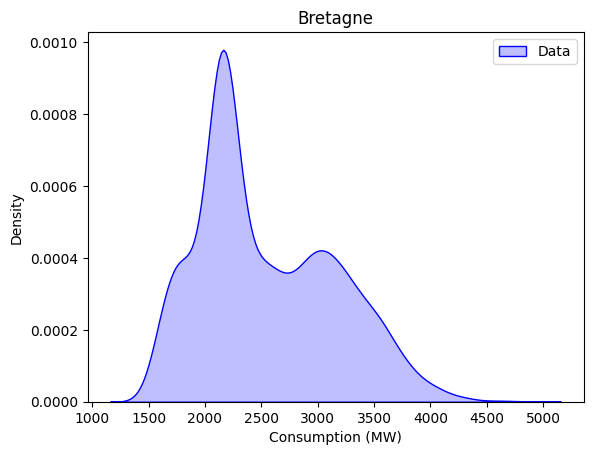

In [12]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Estimation ponctuelle

Dans l'entité du projet, consomation quotidienne d'electricité est supposée i.i.d., avec la distribution gaussienne.

Nous allons utiliser les estimateurs suivants pour la moyenne et la variance, pour $n$ observations $x_1,\ldots,x_n$ :
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
L'estimateur correspondant de l'écart-type est :
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Considérons la region Bretagne. 

1. Montrez que les estimateur pour la moyenne et la variance sont sans biais.

Pour $n$ observations $x_1,\ldots,x_n$, les estimateurs de la moyenne et de la variance sont donnés par :

\begin{align*}
\hat{\mu} &= \frac{1}{n} \sum_{i=1}^n x_i \\
\hat{\sigma^2} &= \frac{1}{n-1} \sum_{i=1}^n (x_i - \hat{\mu})^2
\end{align*}

L'estimateur de l'écart-type correspondant est :

$
\hat{\sigma} = \sqrt{\hat{\sigma^2}}
$

Nous voulons montrer que les estimateurs de la moyenne et de la variance sont sans biais. Pour ce faire, commençons par l'estimateur de la moyenne $\hat{\mu}$ :

$
E(\hat{\mu}) = E\left(\frac{1}{n} \sum_{i=1}^n x_i\right) = \frac{1}{n} \sum_{i=1}^n E(x_i) = \frac{1}{n} \sum_{i=1}^n \mu = \frac{1}{n} \cdot n \cdot \mu = \mu
$

le biais s'écrit :
$ E(\hat{\mu} - \mu) = E(\hat{\mu}) - \mu = 0 $

Donc, l'estimateur de la moyenne $\hat{\mu}$ est sans biais.

Maintenant, examinons l'estimateur de la variance $\hat{\sigma^2}$ :

\begin{align*}
E(\hat{\sigma^2}) &= E\left(\frac{1}{n-1} \sum_{i=1}^n (x_i - \hat{\mu})^2\right) \\
&= \frac{1}{n-1} \sum_{i=1}^n E((x_i - \hat{\mu})^2) \\


\text{E}(\hat{\sigma^2}) = \frac 1 {n-1}\sum_{i=1}^n \text{E}((x_i - \mu + \mu - \hat \mu)^2) \\


&= \frac 1 {n-1}\sum_{i=1}^n \text{E}((x_i)^2) + E(\ \hat \mu)^2 - 2 E(x_i \hat \mu) \\


&= \frac 1 {n-1}\sum_{i=1}^n \text{E}((x_i)^2) + E(\ \hat \mu)^2 - \frac 2 n E(x_i \sum_i x_i) \\

&= \frac 1 {n-1}\sum_{i=1}^n \text{E}((x_i)^2) + E(\ \hat \mu)^2 - \frac 2 n E(x_i) - \frac 2 n E(\sum_{j != i} x_j) \\


&= \frac 1 {n-1}\sum_{i=1}^n (\text{E}((x_i)^2) + E(\ \hat \mu)^2 - \frac 2 n E(x_i^2) - \frac 2 n \sum_{j != i}E(x_i  x_j)) \\


\end{align*}


On a :  

$$
E(x_i^2) = \sigma^2 + \mu^2 
$$


Et on a :

$$
E(\ \hat \mu ^2)  = \frac 1 {n^2} E( \sum_{i=1}^n x_i^2 + \sum_{j != i} x_i x_j)
$$
$$
E(\ \hat \mu ^2)  = \frac 1 {n^2} \sum_{i=1}^nE(x_i^2) + \sum_{j != i}E(x_i x_j)
$$

On remplace $E(x_i^2)$ par l'expression précédente :


$$
E(\ \hat \mu ^2)  = \frac 1 {n^2} n(\sigma^2 + \mu^2) + \sum_{j != i}\mu^2
$$
$$
E(\ \hat \mu ^2)  = \frac 1 {n^2} n(\sigma^2 + \mu^2) + n(n-1)\mu^2
$$

$$
E(\ \hat \mu ^2)  = \frac{\sigma^2 + n\mu^2}{n}
$$

Alors :

$$
    \text{E}(\hat{\sigma^2}) = \frac 1 {n-1}\sum_{i=1}^n (\sigma^2+\mu^2 + \frac{\sigma^2 + n\mu^2}{n} - \frac 2 n (E(x_i^2) + E(\sum_{j != i} x_i x_j)))
$$

$$
    \text{E}(\hat{\sigma^2}) = \frac 1 {n-1}( n(\sigma^2+\mu^2) + \sigma^2 + n\mu^2 - 2 (\sigma^2+\mu^2 + (n-1)\mu^2)) 
$$
$$
    \text{E}(\hat{\sigma^2}) = \frac 1 {n-1}( n(\sigma^2+\mu^2) + \sigma^2 + n\mu^2 - 2 (\sigma^2+\mu^2 + (n-1)\mu^2)) 
$$


$$
    \text{E}(\hat{\sigma^2}) = \frac 1 {n-1} (n-1) \sigma^2
$$

D'où : 

$$
    \text{E}(\hat{\sigma^2}) = \sigma^2
$$









    En conclusion, les estimateurs de la moyenne $\hat{\mu}$ et de la variance $\hat{\sigma^2}$ sont sans biais.

2. Donnez les valeurs obtenues pour la moyen et pour la variance en utilisant ces estimateurs.

In [13]:
''' Return la moyenne emprique '''
def get_moyenne_emprique(df):
    return sum(df["consumption"])/len(df)


''' Returne la varaince empirique''' 
def get_variance_emprique(df, M):
    return sum( (df["consumption"] - M) **2 ) / (len(df) - 1)

In [14]:
## Pour la moyenne utilisant l'estimateur empirique : 
dataBretagne = df[df.region == "Bretagne"]
M = get_moyenne_emprique(dataBretagne)
print(f"la moyenne empirique est :",M)

## Pour la varaince :
V = get_variance_emprique(dataBretagne, M)
print(f"la varaince empirique est :",V )

la moyenne empirique est : 2546.536155666579
la varaince empirique est : 365956.01414481626


3. Générez les nouvelles données en utilisant le modèle gaussien avec ces estimateurs, et avec le même nombre d'observations.

In [15]:
NewdataBretagne = np.random.normal(M, np.sqrt(V), len(dataBretagne))
df_NewdataBretagne = pd.DataFrame({'consumption': NewdataBretagne, 'date': dataBretagne['date'], 'region': dataBretagne['region']})

4. Tracez l'estimateur à noyau de la densité  *kde* (kernel density estimate) des données réelles et des données générées sur la même figure.

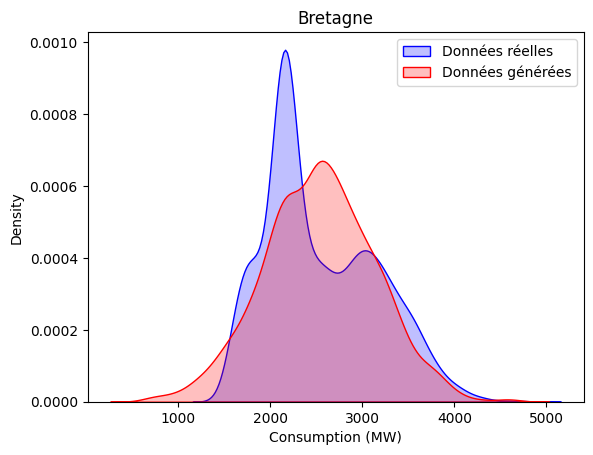

In [16]:
sns.kdeplot(data=df_region, x="consumption", label="Données réelles", color='blue', fill=True)
sns.kdeplot(data=df_NewdataBretagne, x="consumption", label="Données générées", color='red', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

5. Répétez la même procédure pour les jours d'hiver (du 22/12 au 21/03), après avoir mis à jour le modèle.

In [17]:
''''' Fonction qui retourne les données d'hiver sur toutes les années d'une région '''
def get_winter_data(region):
    data_winter = pd.DataFrame()
    winter_data = pd.DataFrame()
    df_region = df[df['region'] == region].copy()

    # Convertir la colonne "date" en type de données datetime
    df_region['date'] = pd.to_datetime(df_region['date'])
    
    for i in range(2012, 2024): # 2012 pour avoir la première partie de 2013
        start_date = pd.to_datetime(f'{i}-12-22')
        end_date = pd.to_datetime(f'{i+1}-03-21')
        winter_data = df_region[(df_region['date'] >= start_date) & (df_region['date'] <= end_date)]
        data_winter = pd.concat([data_winter, winter_data])

    return data_winter

In [18]:
## Les données en hiver de la région Bretagne
dataBretagne_winter = get_winter_data("Bretagne")

## La moyenne empirique en hiver utilisant l'estimateur empirique : 
M_winter = get_moyenne_emprique(dataBretagne_winter)
print(f"la moyenne empirique en hiver est :",M_winter)

## La varaince empirique en hiver:
V_winter = get_variance_emprique( dataBretagne_winter, M_winter)
print(f"la varaince empirique en hiver est :",V_winter)

la moyenne empirique en hiver est : 3214.1782077393077
la varaince empirique en hiver est : 167670.9009313411


In [19]:
# Génération des données en hiver de la région Bretagne
NewdataBretagne_winter = np.random.normal(M_winter, np.sqrt(V_winter), len(dataBretagne_winter))
df_NewdataBretagne_winter = pd.DataFrame({'consumption': NewdataBretagne_winter, 'date': dataBretagne_winter['date']})

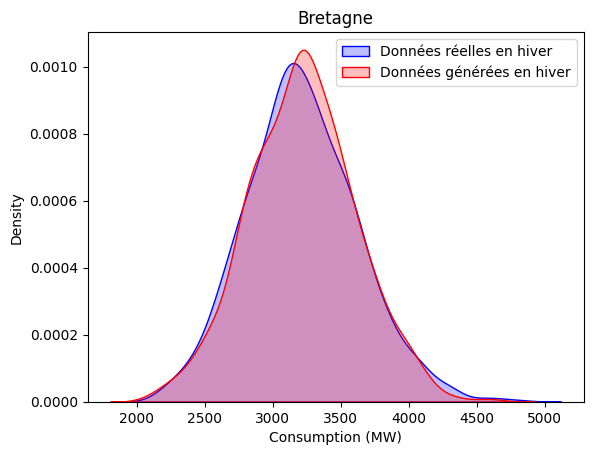

In [20]:
sns.kdeplot(data=dataBretagne_winter, x="consumption", label="Données réelles en hiver", color='blue', fill=True)
sns.kdeplot(data=df_NewdataBretagne_winter, x="consumption", label="Données générées en hiver", color='red', fill=True)
plt.title("Bretagne")
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

6. Dans quel des cas l'hypothèse gaussienne est plus appropriée ?

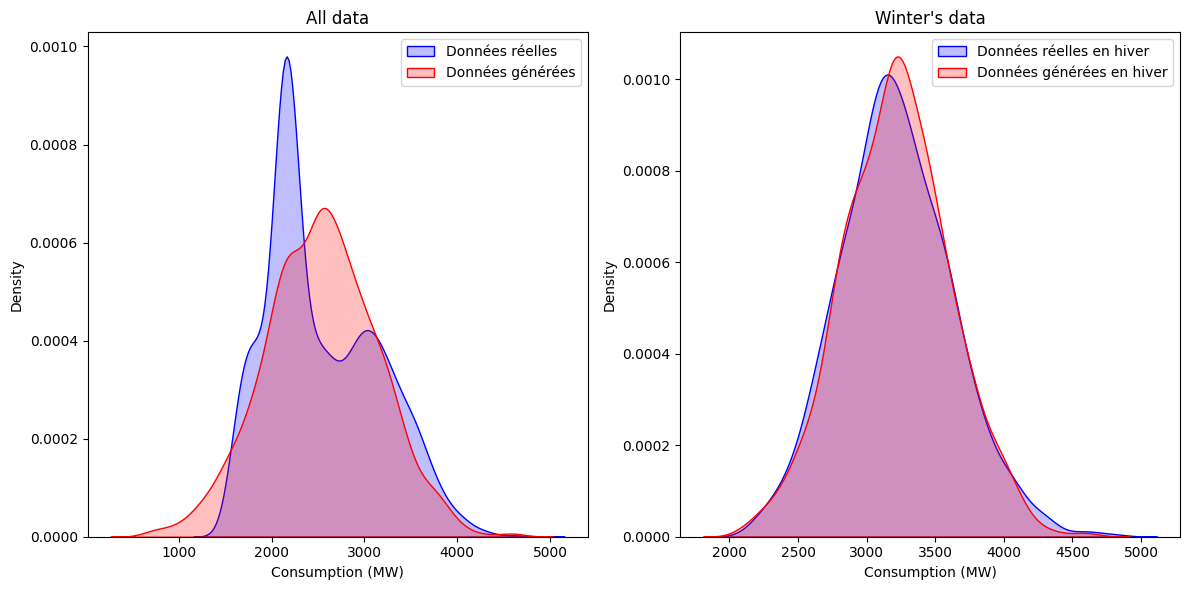

In [21]:
# Affichage des données en hiver et dans toute l'année pour faire la comparaison :
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.kdeplot(data=df_region, x="consumption", label="Données réelles", color='blue', fill=True, ax=axes[0])
sns.kdeplot(data=df_NewdataBretagne, x="consumption", label="Données générées", color='red', fill=True, ax=axes[0])
axes[0].set_title("All data")
axes[0].set_xlabel("Consumption (MW)")
axes[0].legend()


### plotting Winter data
sns.kdeplot(data=dataBretagne_winter, x="consumption", label="Données réelles en hiver", color='blue', fill=True, ax=axes[1])
sns.kdeplot(data=df_NewdataBretagne_winter, x="consumption", label="Données générées en hiver", color='red', fill=True, ax=axes[1])
axes[1].set_title("Winter's data")
axes[1].set_xlabel("Consumption (MW)")
axes[1].legend()

plt.tight_layout()

plt.show()

    On peut remarque que l'hypothèse gaussienne est beaucoup plus appropriée dans le dexième cadre, en hiver.

## B. Goodness of fit

On souhaite confirmer et quantifier l'observation de la partie A.

Nous proposons la mesure de dissimilarité suivante, qui se base sur deux fonctionnes de répartitions $f$ et $g$:
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Montrez que $d(f,g) \in [0,1]$, avec $d(f,g)=0$ si et seulement si $f=g$ presque partout (pour la mesure de Lebesgue) et $d(f,g)=1$ si et seulement si $f$ et $g$ possèdent des supports disjoints.

    Montrons que d(f,g) dans [0,1] : 

On a :

$
 |f(x) - g(x)| \geq 0 \Rightarrow \int |f(x) - g(x)| \mathrm dx \geq 0
$

Alors : 
$
d(f,g) \geq 0
$


On a : 
$
|f(x) - g(x)| \leq |f(x)| - |g(x)|
$

Donc : $\int |f(x) - g(x)|\mathrm dx \leq \int |f(x)|\mathrm dx + \int |g(x)| \mathrm dx$

comme f et g sont des densités de probabilités : 

$ \int |f(x)|\mathrm dx = \int f(x) \mathrm dx = 1 $

$ \int |g(x)|\mathrm dx = \int g(x) \mathrm dx = 1 $

Alors : 
$\int |f(x) - g(x)|\mathrm dx \leq 2 \Rightarrow $
$\frac 1 2 \int |f(x) - g(x)|\mathrm dx \leq 1 $

Donc : 
$d(f,g) \in [0,1]$

    Montrons que d(f,g)=0 si et seulement si f=g presque partout (pour la mesure de Lebesgue) :

$d(f,g)=0 \Rightarrow |f(x) - g(x)| = 0 p. pour tout x$

$ f(x) = g(x)$ presque pourtout x

Donc, f = g presque partout

Supposons $f = g$ pp :

$f = g$ p.p  $\implies \lambda({f \neq g}) = 0  , \lambda $ : mesure de Lebesgue.

On calcule l'intégrale, en posant $ A = {f = g }$

$
\frac 1 2 \int |f(x) - g(x)| dx = \frac 1 2 \int_{A} \int |f(x) - g(x)| dx + \frac 1 2 \int_{A^c} \int |f(x) - g(x)| dx
$

$
= \frac 1 2 \int_{A^c} \int |f(x) - g(x)| dx \leq \frac 1 2 \lambda(A^c) = 0
$
d'où : $d(f,g)= 0$

Alors On a montré les deux implications, $d(f,g)=0$ si et seulement si $f=g$ presque partout (pour la mesure de Lebesgue)

    Montrons que d(f,g)=1 si et seulement si f et g possèdent des supports disjoints : 

Soit F le support de f et G le support de G.

$F \cup G = F \setminus  G + F \cap G + G \setminus F$

Supposons que $d(f,g)=1$ :

On a alors :
    $\int |f(x) - g(x)| \mathrm dx =  \int_{F \cup G} |f(x) - g(x)| \mathrm dx$
    $$ = \int_{F \setminus  G} |f(x) - g(x)| \mathrm dx + \int_{G \cap  F } |f(x) - g(x)| \mathrm dx+ \int_{G \setminus  F } |f(x) - g(x)| \mathrm dx $$
    $$ = \int_{G} |- g(x)| \mathrm dx + \int_{F} |f(x)| \mathrm dx + \int_{G \cap  F } |f(x) - g(x)|  - (f(x) + g(x))  \mathrm dx$$
    $$ = 2 + \int_{G \cap  F } |f(x) - g(x)| - (f(x) + g(x))  \mathrm dx $$ 

Alors : $$ d(f,g)=1 \Rightarrow 1 = 1 + \frac 1 2 \int_{G \cap  F } |f(x) - g(x)| - (f(x) + g(x))  \mathrm  dx $$

$$
\Rightarrow \int_{G \cap  F } |f(x) - g(x)|  - (f(x) + g(x)) \mathrm  dx = 0
$$

Et comme  : $|f(x) - g(x)|  < (f(x) + g(x)) $ 
( En utilisant l'inégalité triangulaire et la posititvité des fonctions densités f et g)

Alors l'intégrale de qlqchose strictement positif n'est nul que si l'intervalle sur lequelle on intégre est de mesure nulle

Donc $G \cap  F$ est de mesure nulle, f et g sont à supports disjoints.




Suppposons que f et g ont des supports disjoints. $ F \cup G = F + G $

et alors : 
 $\int |f(x) - g(x)| \mathrm dx =  \int_{F \cup G} |f(x) - g(x)| \mathrm dx$
 $$ = \int_{G} |f(x) - g(x)| \mathrm dx + \int_{F } |f(x) - g(x)| \mathrm dx $$
 $$ = \int_{G} |- g(x)| \mathrm dx + \int_{F} |f(x)| \mathrm dx $$
 $$ = 2  $$ 
 (car f et g sont des densités de proba)

 Alors :  $\frac 1 2 \int |f(x) - g(x)| \mathrm dx = 1 $

 donc $d(f,g)=1$ on a la deuxième implication

Alors : d(f,g)=1 si et seulement si f et g possèdent des supports disjoints

2. Pour la région Bretagne, calculez la dissimilarité entre le *kde* des données réelles et de la densité du modèle gaussien.

In [22]:
''' Fonction pour calculer la dissimilarité entre f et g '''
def dissimilarity(f, g, grid_points=10000):
    
    x = np.linspace(min(f.min(), g.min()), max(f.max(), g.max()), grid_points) 

    f_density = gaussian_kde(f)(x)
    g_density = gaussian_kde(g)(x)

    integral = np.trapz(np.abs(f_density - g_density), x=x)

    return integral / 2 

# calcul de la dissimilarité entre f et g : 
M = get_moyenne_emprique(df_region) # df_region est la dataframe de la région Bretagne
V = get_variance_emprique(df_region, M)

# calcule de la distribution 
g = np.random.normal(M, np.sqrt(V), len(df_region["consumption"]))
f = df_region["consumption"].values

dissimilarité = dissimilarity(f, g)


print("La dissimilarité :", dissimilarité)


La dissimilarité : 0.18330826628006197


3. Répétez la même procedure pour la région Bretagne en hiver et verifiez votre conclusion de la partie A.

In [23]:
# génération de la gausienne
g_winter = np.random.normal(M_winter, np.sqrt(V_winter), len(dataBretagne_winter["consumption"]))
f_winter = dataBretagne_winter["consumption"].values

# Calcul de la dissimilarité : 
integral_winter = dissimilarity(f_winter, g_winter)

print("La dissimilarité :", integral_winter, '\n')

La dissimilarité : 0.053418697443934175 



4. Répétez la même procedure pour toutes régions. Présentez le résultat dans un seul dataframe.

In [24]:
results = [] # Pour stocker les résultats de dissimilarité
winter_data = pd.DataFrame()
data_winter = pd.DataFrame()
for region in regions:
    ## For the winter :
    # Sélectionnez les données pour la région spécifique
    data_winter = get_winter_data(region)
    
    # Ici on calcule la gausienne la moyenne et la variance pour générer la gausienne :
    M = get_moyenne_emprique(data_winter)
    V = get_variance_emprique( data_winter, M)

    g_winter = np.random.normal(M, np.sqrt(V), len(data_winter["consumption"]))
    f_winter = data_winter["consumption"].values
    
    integral_winter = dissimilarity(f_winter, g_winter)
    results.append({'Region': region, 'Dissimilarity in winter': integral_winter})

# Créez un DataFrame à partir de la liste de résultats
results_df = pd.DataFrame(results)

In [25]:
# Affichage de la DataFrame résulatat des la dissimilarités
print(results_df)

                        Region  Dissimilarity in winter
0         Auvergne-Rhône-Alpes                 0.030487
1      Bourgogne-Franche-Comté                 0.038031
2                     Bretagne                 0.033211
3          Centre-Val de Loire                 0.039079
4                    Grand Est                 0.032197
5              Hauts-de-France                 0.040889
6                    Normandie                 0.035288
7           Nouvelle-Aquitaine                 0.064702
8                    Occitanie                 0.068897
9             Pays de la Loire                 0.034467
10  Provence-Alpes-Côte d'Azur                 0.046705
11               Île-de-France                 0.044702


5. Quelle région a le meilleur *fit* avel le modèle gaussien en hiver ?

In [26]:
min_index = results_df['Dissimilarity in winter'].idxmin()

region_min_dissimilarity = results_df.loc[min_index, 'Region']

print("La région qui a le meilleur fit avec le modèle gaussien en hiver est",region_min_dissimilarity )

La région qui a le meilleur fit avec le modèle gaussien en hiver est Auvergne-Rhône-Alpes


6. Pour ces région et saison, tracez le *kde* des données réelles et le *kde* des données générées sur le même graphique.

In [27]:
data_winter_min_dissimilarity = get_winter_data(region_min_dissimilarity)

## Génération de la gausienne : 
MM = get_moyenne_emprique(data_winter_min_dissimilarity)
VV = get_variance_emprique(data_winter_min_dissimilarity, MM)
Newdata_winter_min_dissimilarity = np.random.normal(MM, np.sqrt(VV), len(data_winter))

In [28]:
df_Newdata_winter_min_dissimilarity = pd.DataFrame({'consumption': Newdata_winter_min_dissimilarity, 'date': data_winter['date']})

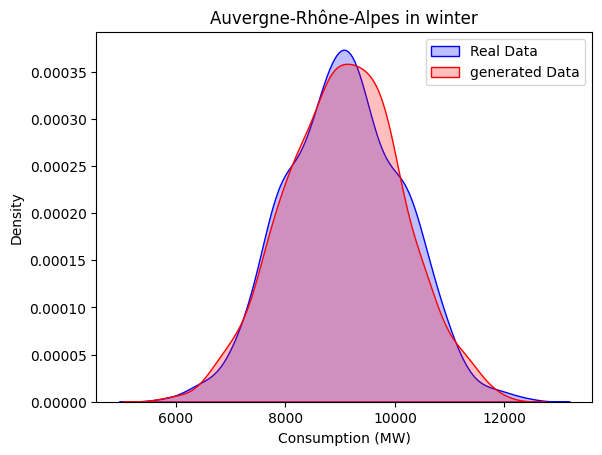

In [29]:
sns.kdeplot(data=data_winter_min_dissimilarity, x="consumption", label="Real Data", color='blue', fill=True)
sns.kdeplot(data=df_Newdata_winter_min_dissimilarity, x="consumption", label="generated Data", color='red', fill=True)
plt.title(region_min_dissimilarity+" in winter")
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## C. Statistique bayésienne

On souhaite inclure la connaissance a priori sur l'estimation, en utilisant la statistique bayésienne.

Considérez la région Bretagne en hiver. On se focalise sur la moyenne $\mu$, en supposant que l'écart-type est connu et egal à $\sigma=400$MW. Supposons la loi a priori sur $\mu$ avec moyenne $\mu_0=3500$MW et l'écart-type $\sigma_0=500$MW.

1. Donnez la loi a posteriori pour $\mu$, en utilisant les paramètres $\sigma$, $\mu_0$, $\sigma_0$ et $n$ observations $x_1,\ldots,x_n$.

La loi a posteriori pour $\mu$ en utilisant la statistique bayésienne est donnée par la formule de la loi de probabilité conditionnelle de $\mu$ sachant les données observées $x_1, x_2, \ldots, x_n$. Cette loi est :

$
\pi(\mu | x_1, x_2, \ldots, x_n) \propto P(x_1, x_2, \ldots, x_n | \mu) \cdot P(\mu)
$

Dans ce cas, on suppose que les données $x_i$ suivent une distribution normale avec une moyenne $\mu$ et un écart-type connu $\sigma=400$ MW, ce qui signifie que la probabilité est donnée par :

$
P(x_1, x_2, \ldots, x_n | \mu) \propto \prod_{i=1}^n \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right) = \exp\left(-\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2\right)
$

La loi a priori sur $\mu$ est également une distribution normale avec une moyenne $\mu_0=3500$ MW et un écart-type $\sigma_0=500$ MW, ce qui signifie que la loi a priori est donnée par :

$
P(\mu) \propto \exp\left(-\frac{(\mu - \mu_0)^2}{2\sigma_0^2}\right)
$

En combinant ces deuw expressions, on obtient la loi a posteriori non normalisée :

$
\pi(\mu | x_1, x_2, \ldots, x_n) \propto \exp\left(-\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2\right) \cdot \exp\left(-\frac{(\mu - \mu_0)^2}{2\sigma_0^2}\right)
$

Pour normaliser cette loi, on peut ignorer les termes constants. La loi a posteriori normalisée sera donc une distribution normale dont les paramètres sont déterminés par les paramètres de la loi a priori et les données observées.


    Moyenne de la loi à posteriori : 
$
\mu_{\text{posterior}} = \frac{\sigma^2}{\sigma^2 + n\sigma_0^2} \cdot \mu_0 + \frac{n\sigma_0^2}{\sigma^2 + n\sigma_0^2} \cdot \bar{x}
$


    Écart-type de la loi a posteriori :
$
\sigma_{\text{posterior}} = \sqrt{\frac{1}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}}
$

2. Donnez les paramètres de la loi a posteriori obtenue pour chaque année de 2013 au 2023, considérée independament, dans un seul dataframe.

In [30]:
results_loi_post = []
year_data = pd.DataFrame()
region = 'Bretagne'
df_region = df[df['region'] == region]

df_region['date'] = pd.to_datetime(df_region['date'])

# paramètres connus :
sigma = 400
sigma0 = 500
mu_0 = 3500

for i in range(2014,2024):
    # Sélectionnez les données pour l'année
    start_date = pd.to_datetime(f'{i-1}-12-22')
    end_date = pd.to_datetime(f'{i}-03-21')
    winter_year_data = df_region[(df_region['date'] >= start_date) & (df_region['date'] <= end_date)]

    n = len(winter_year_data)
    
    X_bar = sum(winter_year_data['consumption'])

    # calcul de la moyenne :
    moy_post = (sigma**2 * mu_0 / (sigma**2 + n*(sigma0**2))) + ((sigma0**2)*X_bar / ((sigma**2) + n *(sigma0**2)))

    # calcul de l'écart type : 
    ecart_type_post = np.sqrt(1 / ((1/sigma0**2)+(n/sigma**2)))
    
    results_loi_post.append({'Year': i, 'Moyenne': moy_post, 'Ecart type':ecart_type_post})

# Créez un DataFrame à partir de la liste de résultats
results_loi_post_df = pd.DataFrame(results_loi_post)

C:\Users\user\AppData\Local\Temp\ipykernel_13964\3206612150.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])


In [31]:
print(results_loi_post_df)

   Year      Moyenne  Ecart type
0  2014  3095.134598   42.014582
1  2015  3229.578553   42.014582
2  2016  3133.762549   41.784716
3  2017  3275.816417   42.014582
4  2018  3328.695940   42.014582
5  2019  3179.931598   42.014582
6  2020  3124.061545   41.784716
7  2021  3360.657546   42.014582
8  2022  3216.041483   42.014582
9  2023  3061.154016   42.014582


3. Tracez la densité de la loi a posteriori en 2023 et le *kde* des données réelles en 2023, sur le même graphique.

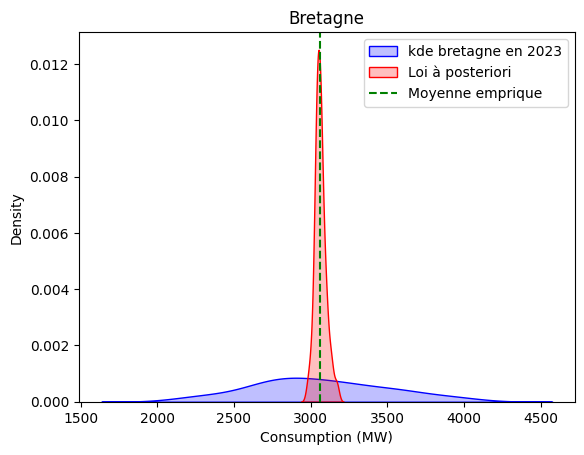

In [32]:
# calcul de la loi à posteriori :

#data de Bretagne en 2023 : 
start_date = pd.to_datetime('2022-12-22')
end_date = pd.to_datetime('2023-03-21')

dataBretagne_year_2023 = df_region[(df_region['date'] >= start_date) & (df_region['date'] <= end_date)]

# loi :
loi_a_post = np.random.normal(results_loi_post_df['Moyenne'][9], results_loi_post_df['Ecart type'][9], len(dataBretagne_year_2023))

df_loi_a_post = pd.DataFrame({'consumption': loi_a_post, 'date': dataBretagne_year_2023['date']})


sns.kdeplot(data=dataBretagne_year_2023, x="consumption", label="kde bretagne en 2023", color='blue', fill=True)
sns.kdeplot(data=df_loi_a_post, x="consumption", label="Loi à posteriori", color='red', fill=True)
plt.title(region)

plt.axvline(x=get_moyenne_emprique(dataBretagne_year_2023), color='green', linestyle='--', label='Moyenne emprique')

plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

In [33]:
## Pour générer la loi normale à partir de la loi à posteriori :

# La valeur la plus probable (le mode) d'une distribution normale est la moyenne
mode = np.mean(loi_a_post)
loi_avec_loi_a_post = np.random.normal(mode,400 , len(dataBretagne_year_2023))
df_loi_avec_loi_a_post = pd.DataFrame({'consumption': loi_avec_loi_a_post})

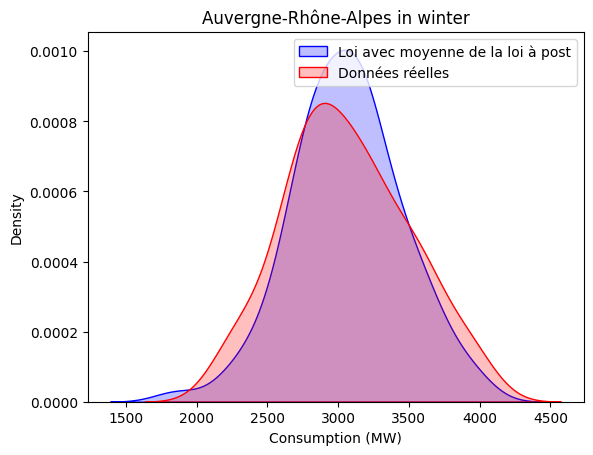

In [34]:
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.kdeplot(data=df_loi_avec_loi_a_post, x="consumption", label="Loi avec moyenne de la loi à post", color='blue', fill=True)
sns.kdeplot(data=dataBretagne_year_2023, x="consumption", label="Données réelles", color='red', fill=True)
plt.title(region_min_dissimilarity+" in winter")
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

4. Discutez les résultats, en les comparant avec ceux obtenus dans la partie A.

Votre réponse : 
    
    L'estimateur bayésien est généralement le mode de la distribution à posteriori, donc en traçant une densité avec cet estimateur et le comparant avec avec la partie A, on s'attend à une dissimilarité plus faible dans le deuxième cas puisque on utilise une loi à priori, mais dans notre cas les deux apparaient à faible dissimilarité, mais peut être dans d'autres cas ( d'autres données, d'autres situations), la contribution de l'information à priori peut mieux apparaitre et mieux approcher la distribution. 

## D. Test d'hypothèse

Considérez la région Bretagne. Alors que l'écart-type en hiver est egal à 400MW, vous shouaitez tester l'hypothèse que c'était 500MW en 2023. La moyenne est supposée connue et egal à 3200MW.

1. Proposez la statisque du test pour un niveau $\alpha$.

Pour tester l'hypothèse que l'écart-type en hiver 2023 était de 500 MW, on peut utiliser un test d'hypothèse basé sur la statistique du test appelée le rapport de vraisemblance (Likelihood Ratio Test). Le test consiste à comparer deux modèles : 

    un modèle nul où l'écart-type est égal à 400 MW en hiver 2023, et un modèle alternatif où l'écart-type est égal à 500 MW en hiver 2023. La statistique du test est le rapport de vraisemblance entre ces deux modèles.

La statistique du test est définie comme suit :
$
\Z(x) = \frac{P_1(x)}{P_0(x)}
$

$
\Z(x) = \frac{\frac{1}{\sqrt{2\pi \sigma_{1,23}}} e^{ - \frac{\sum{(x_i-\mu)^2}}{\sigma_{1,23}^2}}}{\frac{1}{\sqrt{2\pi \sigma_{0,23}}} e^{ - \frac{\sum{(x_i-\mu)}^2}{ \sigma_{0,23}^2 }}} = \frac{\sigma_{1,23}}{\sigma_{0,23}} e^{-\frac{1}{2} \sum(x_i - \mu)^2 (\frac{1}{\sigma_{0,23}^2} \frac{1}{\sigma_{1,23}^2})}
$


Procedons comme ça pour finalement arriver à : 
$\Z(x) < c \equiv \sum (x_i-\mu)^2 < - 2 \frac{1}{ \frac{1}{\sigma_{0,23}} -\frac{1}{\sigma_{1,23}} }*  c * \frac{\sigma_{1,23}}{\sigma_{0,23}}  $

$\equiv \sum \frac{(x_i-\mu )^2}{\sigma_{0,23} ^2} < - \frac{2}{\sigma_{0,23} ^2} \frac{1}{ \frac{1}{\sigma_{0,23}} -\frac{1}{\sigma_{1,23}} }*  c * \frac{\sigma_{1,23}}{\sigma_{0,23}}  $

Alors on peut utiliser le quantile de Loi du χ², pour définir une loi de décision : 

$ \delta = \begin{cases}
  1, & \text{si } \xi(X) < D \\
  0, & \text{si } \xi(X) \geq D
\end{cases} $

où $D = - \frac{2}{\sigma_{0,23} ^2} \frac{1}{ \frac{1}{\sigma_{0,23}} -\frac{1}{\sigma_{1,23}} }*  c * \frac{\sigma_{1,23}}{\sigma_{0,23}}  $
et $X = (x_1, x_2, ... , x_n)$

2. Donnez le résultat de ce test pour $\alpha=1\%$.

In [35]:
start_date = pd.to_datetime('2022-12-22')
end_date = pd.to_datetime('2023-03-21')

dataBretagne_year_winter2023 = df_region[(df_region['date'] >= start_date) & (df_region['date'] <= end_date)]

n = len(dataBretagne_year_winter2023)
alpha = 0.01
p = 1 - alpha

quantile = chi2.ppf(p, n)

print(f"Quantile de la loi du chi-carré (degré de liberté = {n}, probabilité = {p}) : {quantile}")

# calulons :
S=0
scc = np.array(dataBretagne_year_winter2023["consumption"])

for i in range(n):
    S += ((scc[i] - 3200)**2) / (400**2)

print("Xi(X) dans ce cas est ègale à : ", S)

Quantile de la loi du chi-carré (degré de liberté = 90, probabilité = 0.99) : 124.11631868612129
Xi(X) dans ce cas est ègale à :  117.10018124999999


    Donc on accepte H0 car Xi(X) < quantile

## E. Test d'indépendence

Considérez la consomation d'electicité en Bretagne et en Provence-Alpes-Côte d'Azur en hiver.

1. Visualisez la loi jointe de la consomation dans ces 2 régions en utilisant la librarie **seaborn**.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


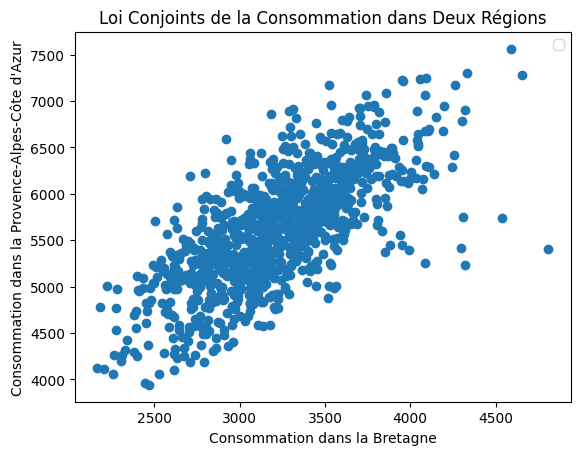

In [36]:
# On a dataBretagne_winter et créeons un df pour dataPACA_winter

dataPACA_winter = get_winter_data("Provence-Alpes-Côte d'Azur")

a = dataBretagne_winter["consumption"]
b = dataPACA_winter["consumption"]

plt.scatter(a,b)

plt.title("Loi Conjoints de la Consommation dans Deux Régions")
plt.xlabel("Consommation dans la Bretagne")
plt.ylabel("Consommation dans la Provence-Alpes-Côte d'Azur")
plt.legend()
plt.show()

2. Est-ce que vous pensez que la consomation dans ces 2 régions est indépendante ?

Il semble que la consommation dans les deux régions, Bretagne et Provence-Alpes-Côte d'Azur, ne soit pas totalement indépendante, mais plutôt qu'il y ait une certaine relation linéaire entre elles. Cela signifie qu'il existe une corrélation ou une dépendance entre les niveaux de consommation dans ces deux régions, bien que cela ne signifie pas nécessairement une relation de cause à effet.
La présence d'une linéarité sur le graphique de la question précédente suggère que lorsque la consommation augmente dans l'une des régions, elle a tendance à augmenter dans l'autre région également, ou vice versa.

3. Proposez le test du Chi-2 pour l'indépendance de la consomation dans ces deux régions pour un niveau $\alpha$. 

Votre réponse : 

Hypothèse nulle (H0) : Il n'y a pas d'association entre la consommation dans les deux régions. \
Hypothèse alternative (H1) : Il y a une association entre la consommation dans les deux régions.

In [37]:
''' Méthode pour faire les partitions : '''
# Création des partitions :  ( A : Bretagne , B : Provence-Alpes-Côte d'Azur)

A = [[],[],[],[]] # liste des partitions Ak

a1 = 3000
a2 = 4200

B = [[],[],[],[]] # liste des partitions Bk

b1 = 5600
b2 = 7000

bornes_a = [ a1, (a1+a2)//2, a2]
bornes_b = [ b1, (b1+b2)//2, b2]

for value in a:
    if value < bornes_a[0]:
        A[0].append(value)
    elif value < bornes_a[1]:
        A[1].append(value)
    elif value < bornes_a[2]:
        A[2].append(value)
    else:
        A[3].append(value)


# Ajoutez les données de la région 'b' aux partitions B en fonction des bornes
for value in b:
    if value < bornes_b[0]:
        B[0].append(value)
    elif value < bornes_b[1]:
        B[1].append(value)
    elif value < bornes_b[2]:
        B[2].append(value)
    else:
        B[3].append(value)

In [38]:
''' Fonctions pour calculer les coefficients Nij, Ni et Nj'''
def Nij_(i , j, a, b, A , B):
    S = 0
    a = list(a)
    b = list(b)
    for k in range(len(a)):
        if (np.isin( a[k], A[i]) and np.isin( b[k], B[j])):
            S+=1
    return S


def Ni_(i, a, A):
    S = 0
    for valuea in a:
        if np.isin(valuea, A[i]):
            S+= 1
    return S


def Nj_(j,b, B):
    S = 0
    for valueb in b:
        if np.isin(valueb, B[j]):
            S+=1
    return S

In [39]:
test_khi2 = 0
test_khi1 = 0

a = dataBretagne_winter["consumption"]
b = dataPACA_winter["consumption"]

aa = list(dataBretagne_winter["consumption"])
bb = list(dataPACA_winter["consumption"])

for i in range(4):
    test_khi1 = 0
    for j in range(4):
        Nij = Nij_(i, j, a, b, A, B)
        Ni = Ni_(i, a, A)
        Nj = Nj_(j, b, B)

        test_khi1 += (((Nij - ( Ni * Nj)/n)) **2 ) / ( Ni* Nj / n)
    test_khi2 += test_khi1

print("le test du Chi-2 pour l'indépendance de la consomation dans ces deux régions pour un niveau alpha est : T = ", test_khi2)

le test du Chi-2 pour l'indépendance de la consomation dans ces deux régions pour un niveau alpha est : T =  8885.30160538294


4. Donnez le résultat de ce test pour $\alpha=1\%$.

In [44]:
alpha = 0.01
df_ = 9
chi2_quantile = chi2.ppf(1 - alpha, df_)
print("le quantile de niveau (1 - alpha) : ",chi2_quantile)

le quantile de niveau (1 - alpha) :  21.665994333461924


    On remarque que notre statistique observée du chi carré (8917.34) est supérieure à la valeur critique du chi carré (21.665) au niveau de 0,01, alors on rejete l'hypothèse nulle. Cela suggère qu'il existe des preuves d'une différence ou d'une association significative dans la consommation dans les deux régions.

## F. Intervalle de confiance

Considérez la région Bretagne en hiver.

1. Donnez l'intervalle de confiance pour un niveau $\alpha=95\%$ pour la moyenne consomation d'electricité.

In [41]:
# quantile
alpha = 0.05

a = dataBretagne_winter["consumption"]

# quantile de niveau (1 - alpha/2) de la loi student à n-1 degrés de liberté
quantile = t.ppf(1 - alpha/2, len(a) - 1)

M_winter_ = get_moyenne_emprique(dataBretagne_winter)
V_winter_ = get_variance_emprique(dataBretagne_winter, M_winter_)

# L'interval de confiance :
IC = [M_winter_ - quantile * np.sqrt(V_winter_) / np.sqrt(len(a)), M_winter_ + quantile * np.sqrt(V_winter_) / np.sqrt(len(a))]

print("l'interval de confiance de la moyenne de la consommation dans la Bretagne est :", IC)

l'interval de confiance de la moyenne de la consommation dans la Bretagne est : [3188.5358856463263, 3239.820529832289]


    L'interval de confiance de la moyenne de la consommation dans la Bretagne est : [3188.5358856463263, 3239.820529832289]

2. Donnez le résultat du test de Student pour un niveau $5\%$ pour l'hypothèse null que la moyenne consomation en 2023 est egal à 3100MW.

In [42]:
M_winter = get_moyenne_emprique(dataBretagne_year_winter2023)
V_winter = get_variance_emprique(dataBretagne_year_winter2023, M_winter)

# Calcul de la statistique de test t
t_statistic = (M_winter - 3100) / ( np.sqrt(V_winter)  / np.sqrt(len(a)))

# Calcul de la valeur critique en utilisant la distribution de Student
t_critical = t.ppf(1 - alpha/2, len(dataBretagne_year_winter2023) - 1)

In [43]:
# Test d'hypothèse
if abs(t_statistic) > t_critical:
    print("On rejette l'hypothèse nulle : la moyenne est différente de 3100 MW.")
else:
    print("On ne peut pas rejeter l'hypothèse nulle : la moyenne n'est pas significativement différente de 3100 MW.")

On rejette l'hypothèse nulle : la moyenne est différente de 3100 MW.


    On rejette l'hypothèse nulle : la moyenne est différente de 3100 MW.